In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

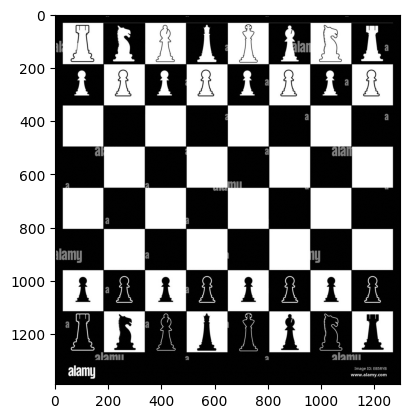

In [68]:
image = cv2.imread('layout-of-a-chess-board-in-black-and-white-EB5RYB.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

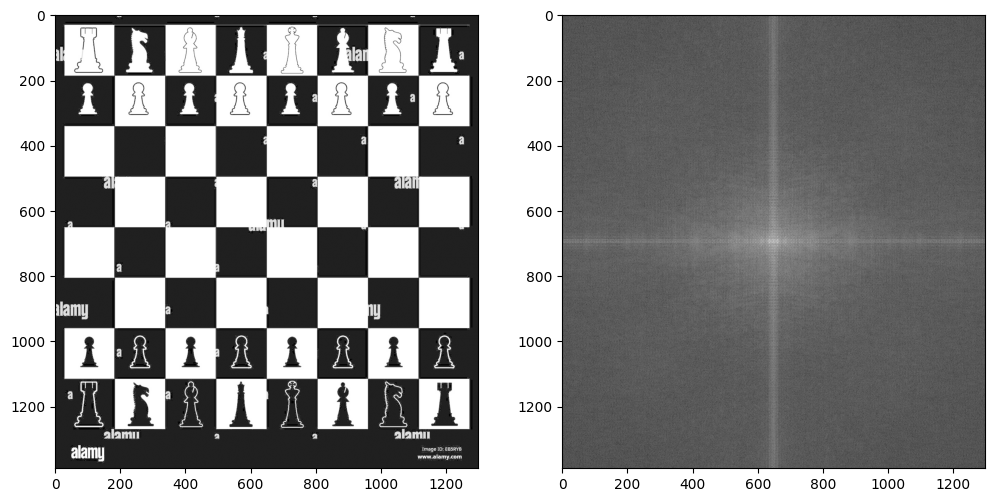

In [69]:
log_image = np.log1p(image)

f = np.fft.fft2(log_image)
shifted_f = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(shifted_f) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(log_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

# Ideal Lowpass Filter

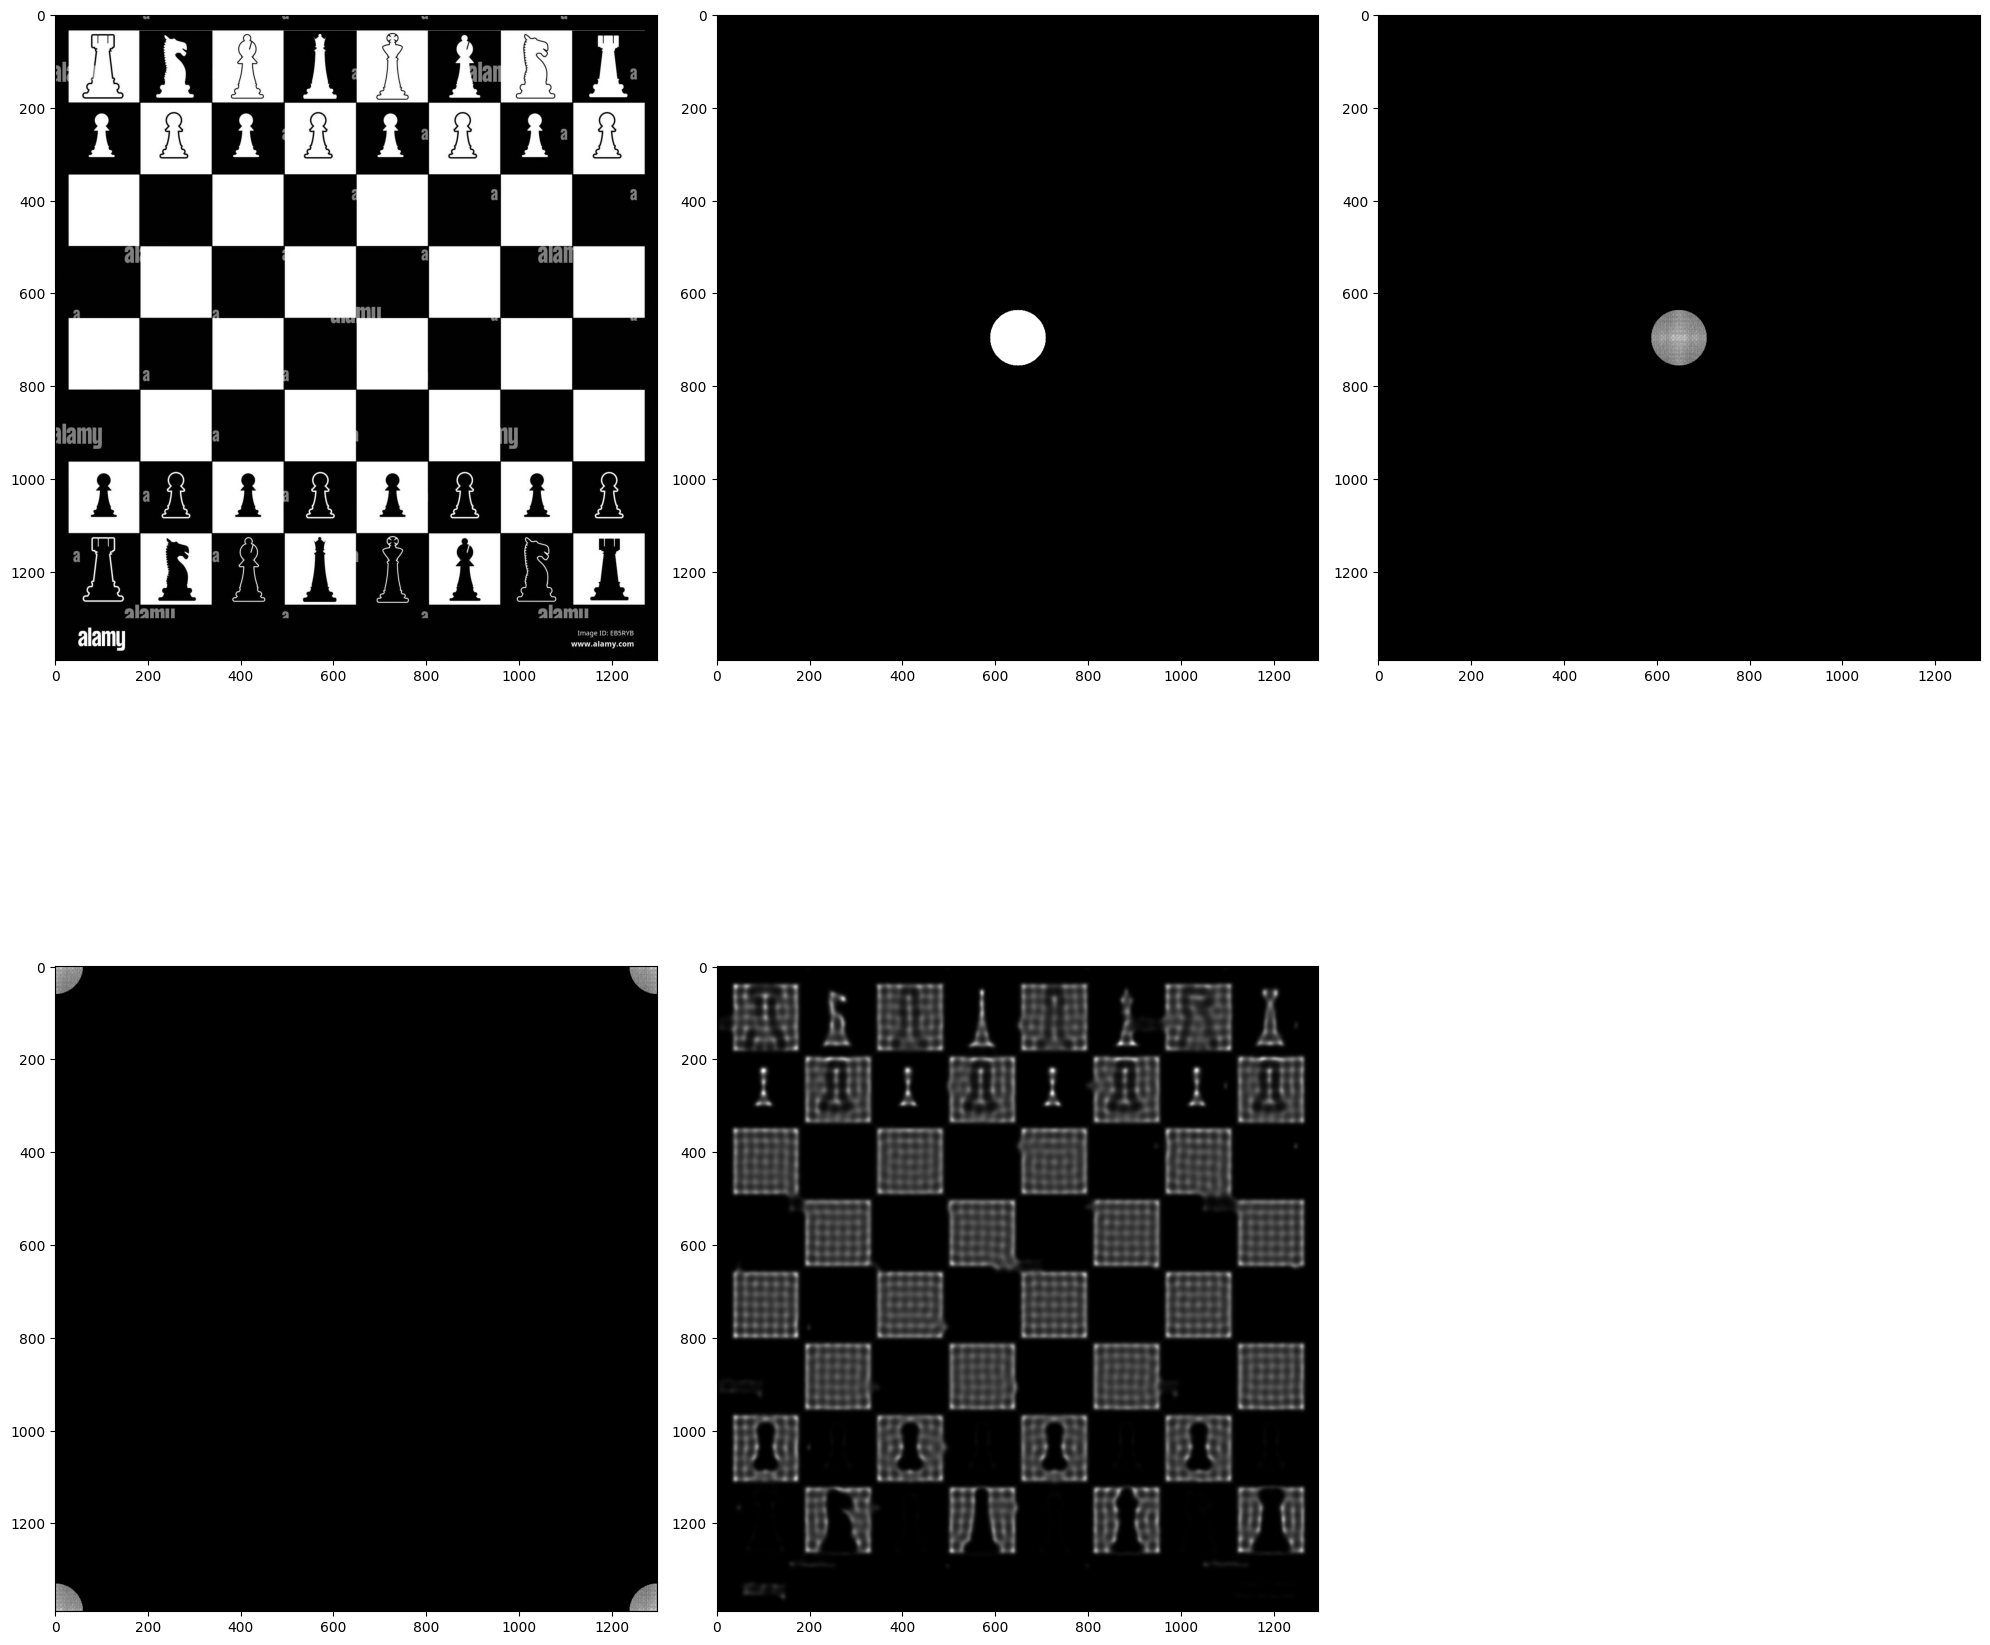

In [70]:
rows, cols = image.shape
def distance(x, y):
    return np.sqrt((x - rows//2)**2 + (y - cols//2) ** 2)
Ideal_Lowpass = np.ones(image.shape, dtype=np.float32)
D0 = 60
for i in range(rows):
    for j in range(cols):
        if distance(i, j) > D0:
            Ideal_Lowpass[i, j] = 0
        else:
            Ideal_Lowpass[i, j] = 1

f_filtered = shifted_f * Ideal_Lowpass

f_filtered_shifted = np.fft.ifftshift(f_filtered)

new_img = np.abs(np.fft.ifft2(f_filtered_shifted))

final_img = np.expm1(new_img)

plt.figure(figsize=(20, 20))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(Ideal_Lowpass, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(np.log1p(np.abs(f_filtered)), cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(np.log1p(np.abs(f_filtered_shifted)), cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(final_img, cmap='gray')
plt.tight_layout()
plt.show()

# Butterworth Lowpass Filters

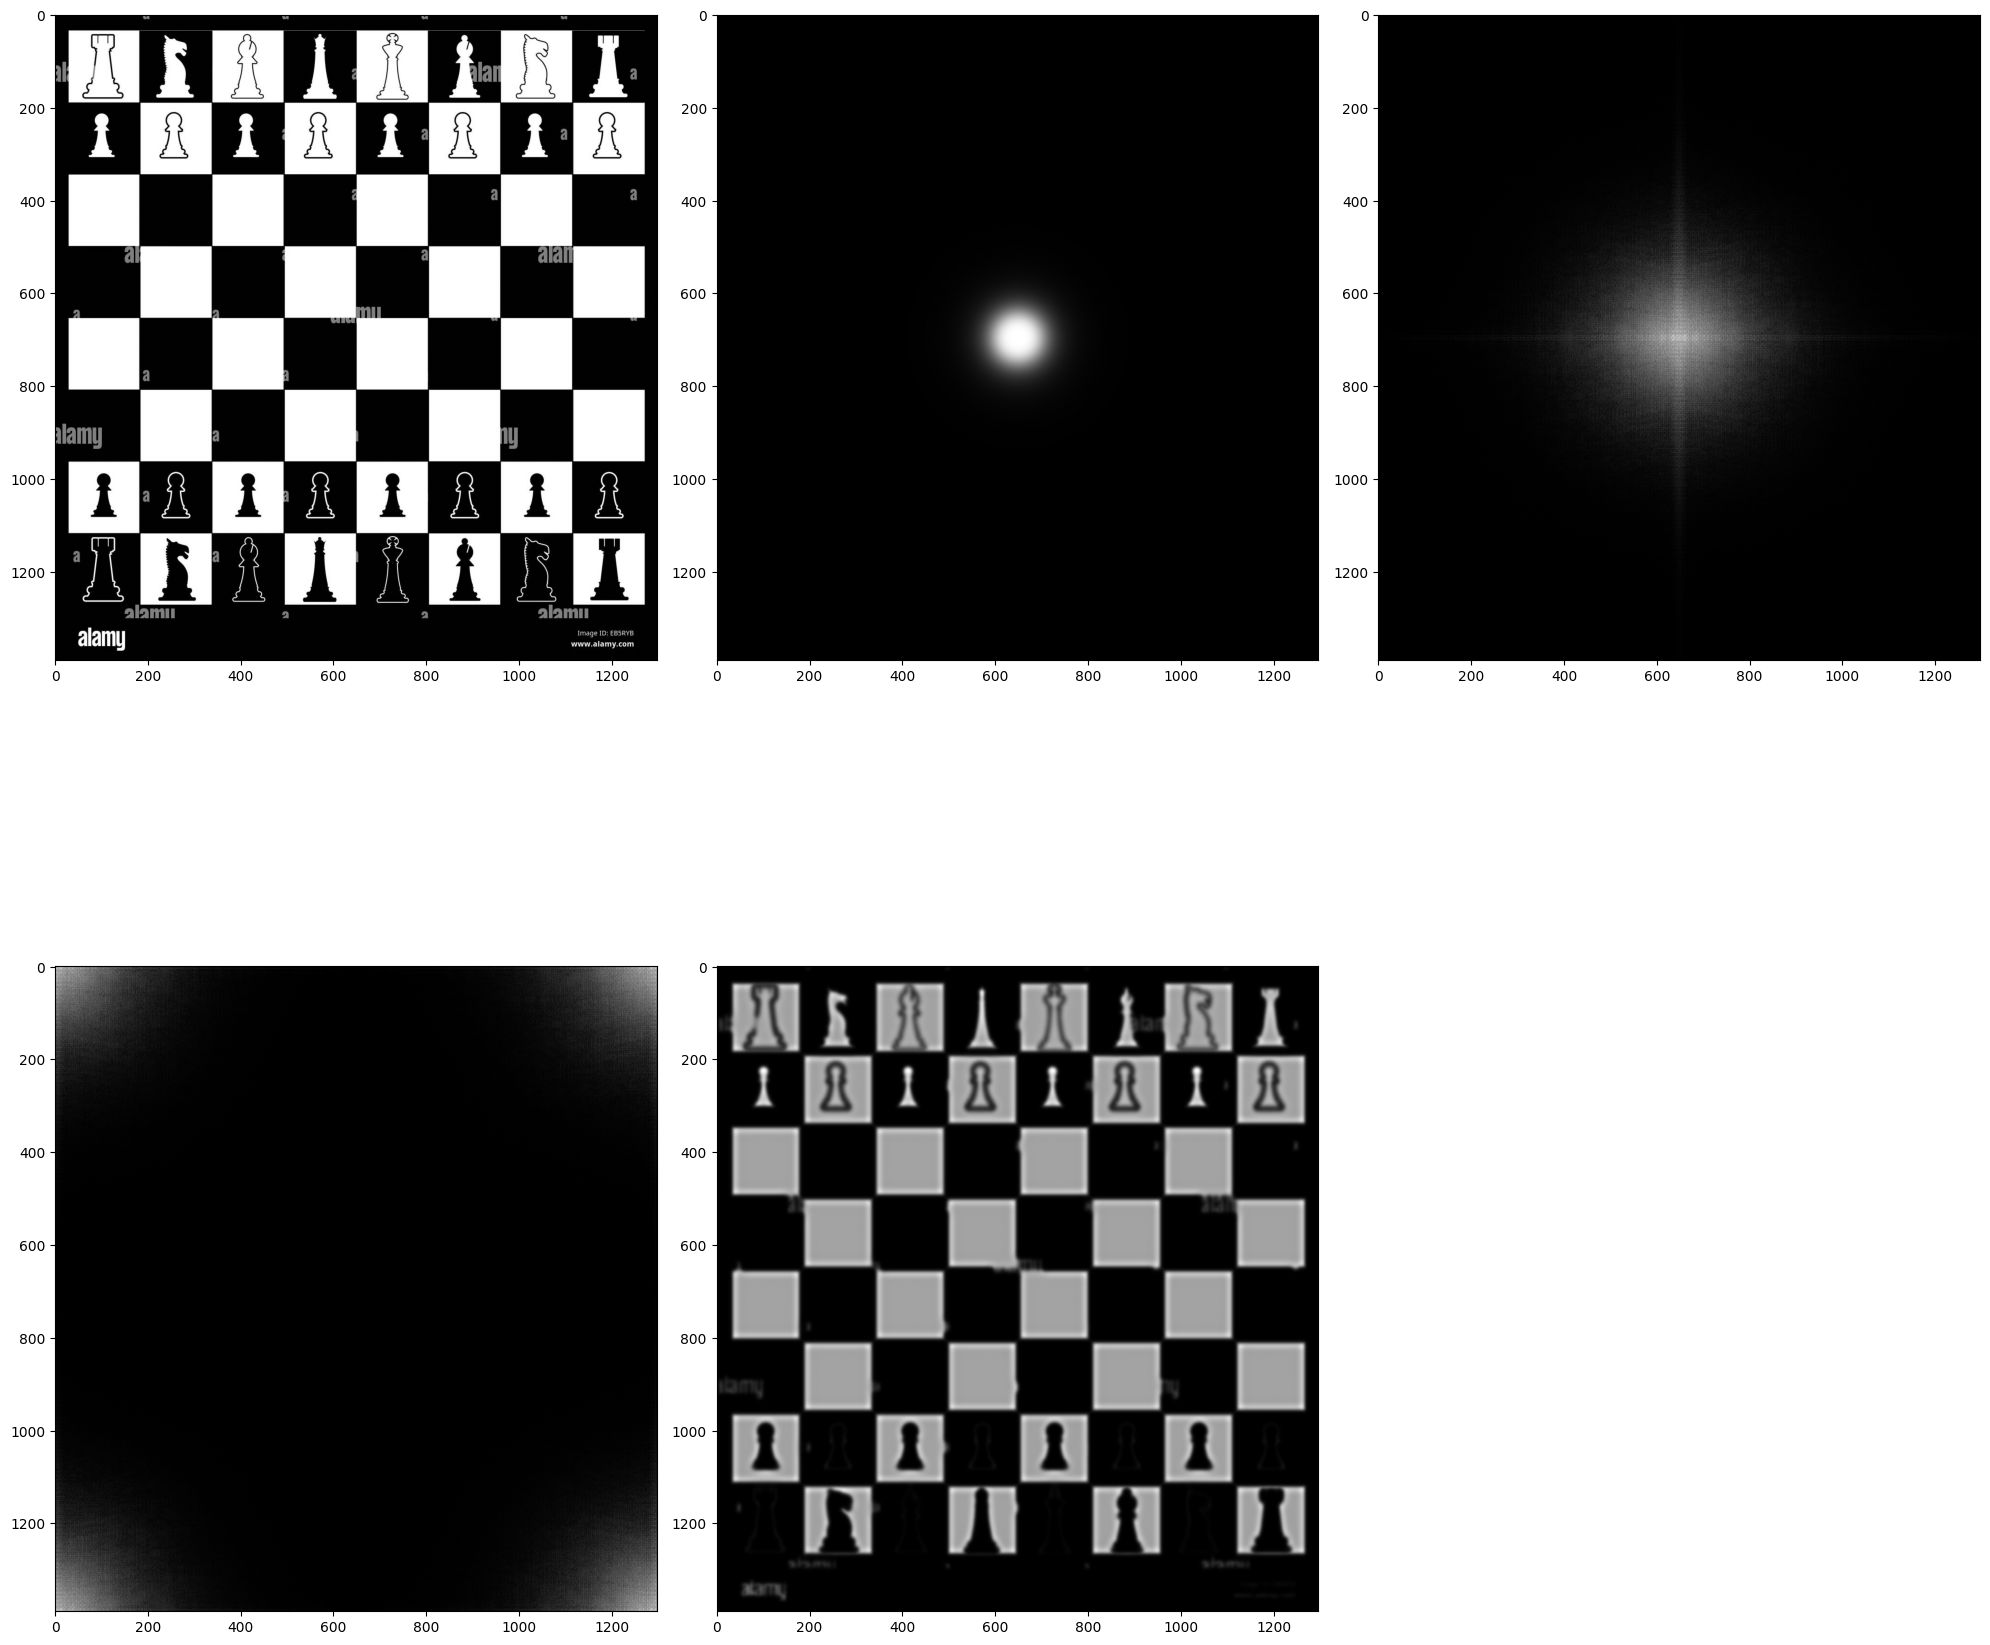

In [71]:
rows, cols = image.shape
Butterworth_Lowpass = np.ones(image.shape, dtype=np.float32)
D0 = 60
n = 2
for i in range(rows):
    for j in range(cols):
        Butterworth_Lowpass[i, j] = 1 / (1 + (distance(i, j)/D0)**(2 * n))

f_filtered = shifted_f * Butterworth_Lowpass

f_filtered_shifted = np.fft.ifftshift(f_filtered)

new_img = np.abs(np.fft.ifft2(f_filtered_shifted))

final_img = np.expm1(new_img)

plt.figure(figsize=(20, 20))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(Butterworth_Lowpass, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(np.log1p(np.abs(f_filtered)), cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(np.log1p(np.abs(f_filtered_shifted)), cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(final_img, cmap='gray')
plt.tight_layout()
plt.show()

# Gaussian Lowpass

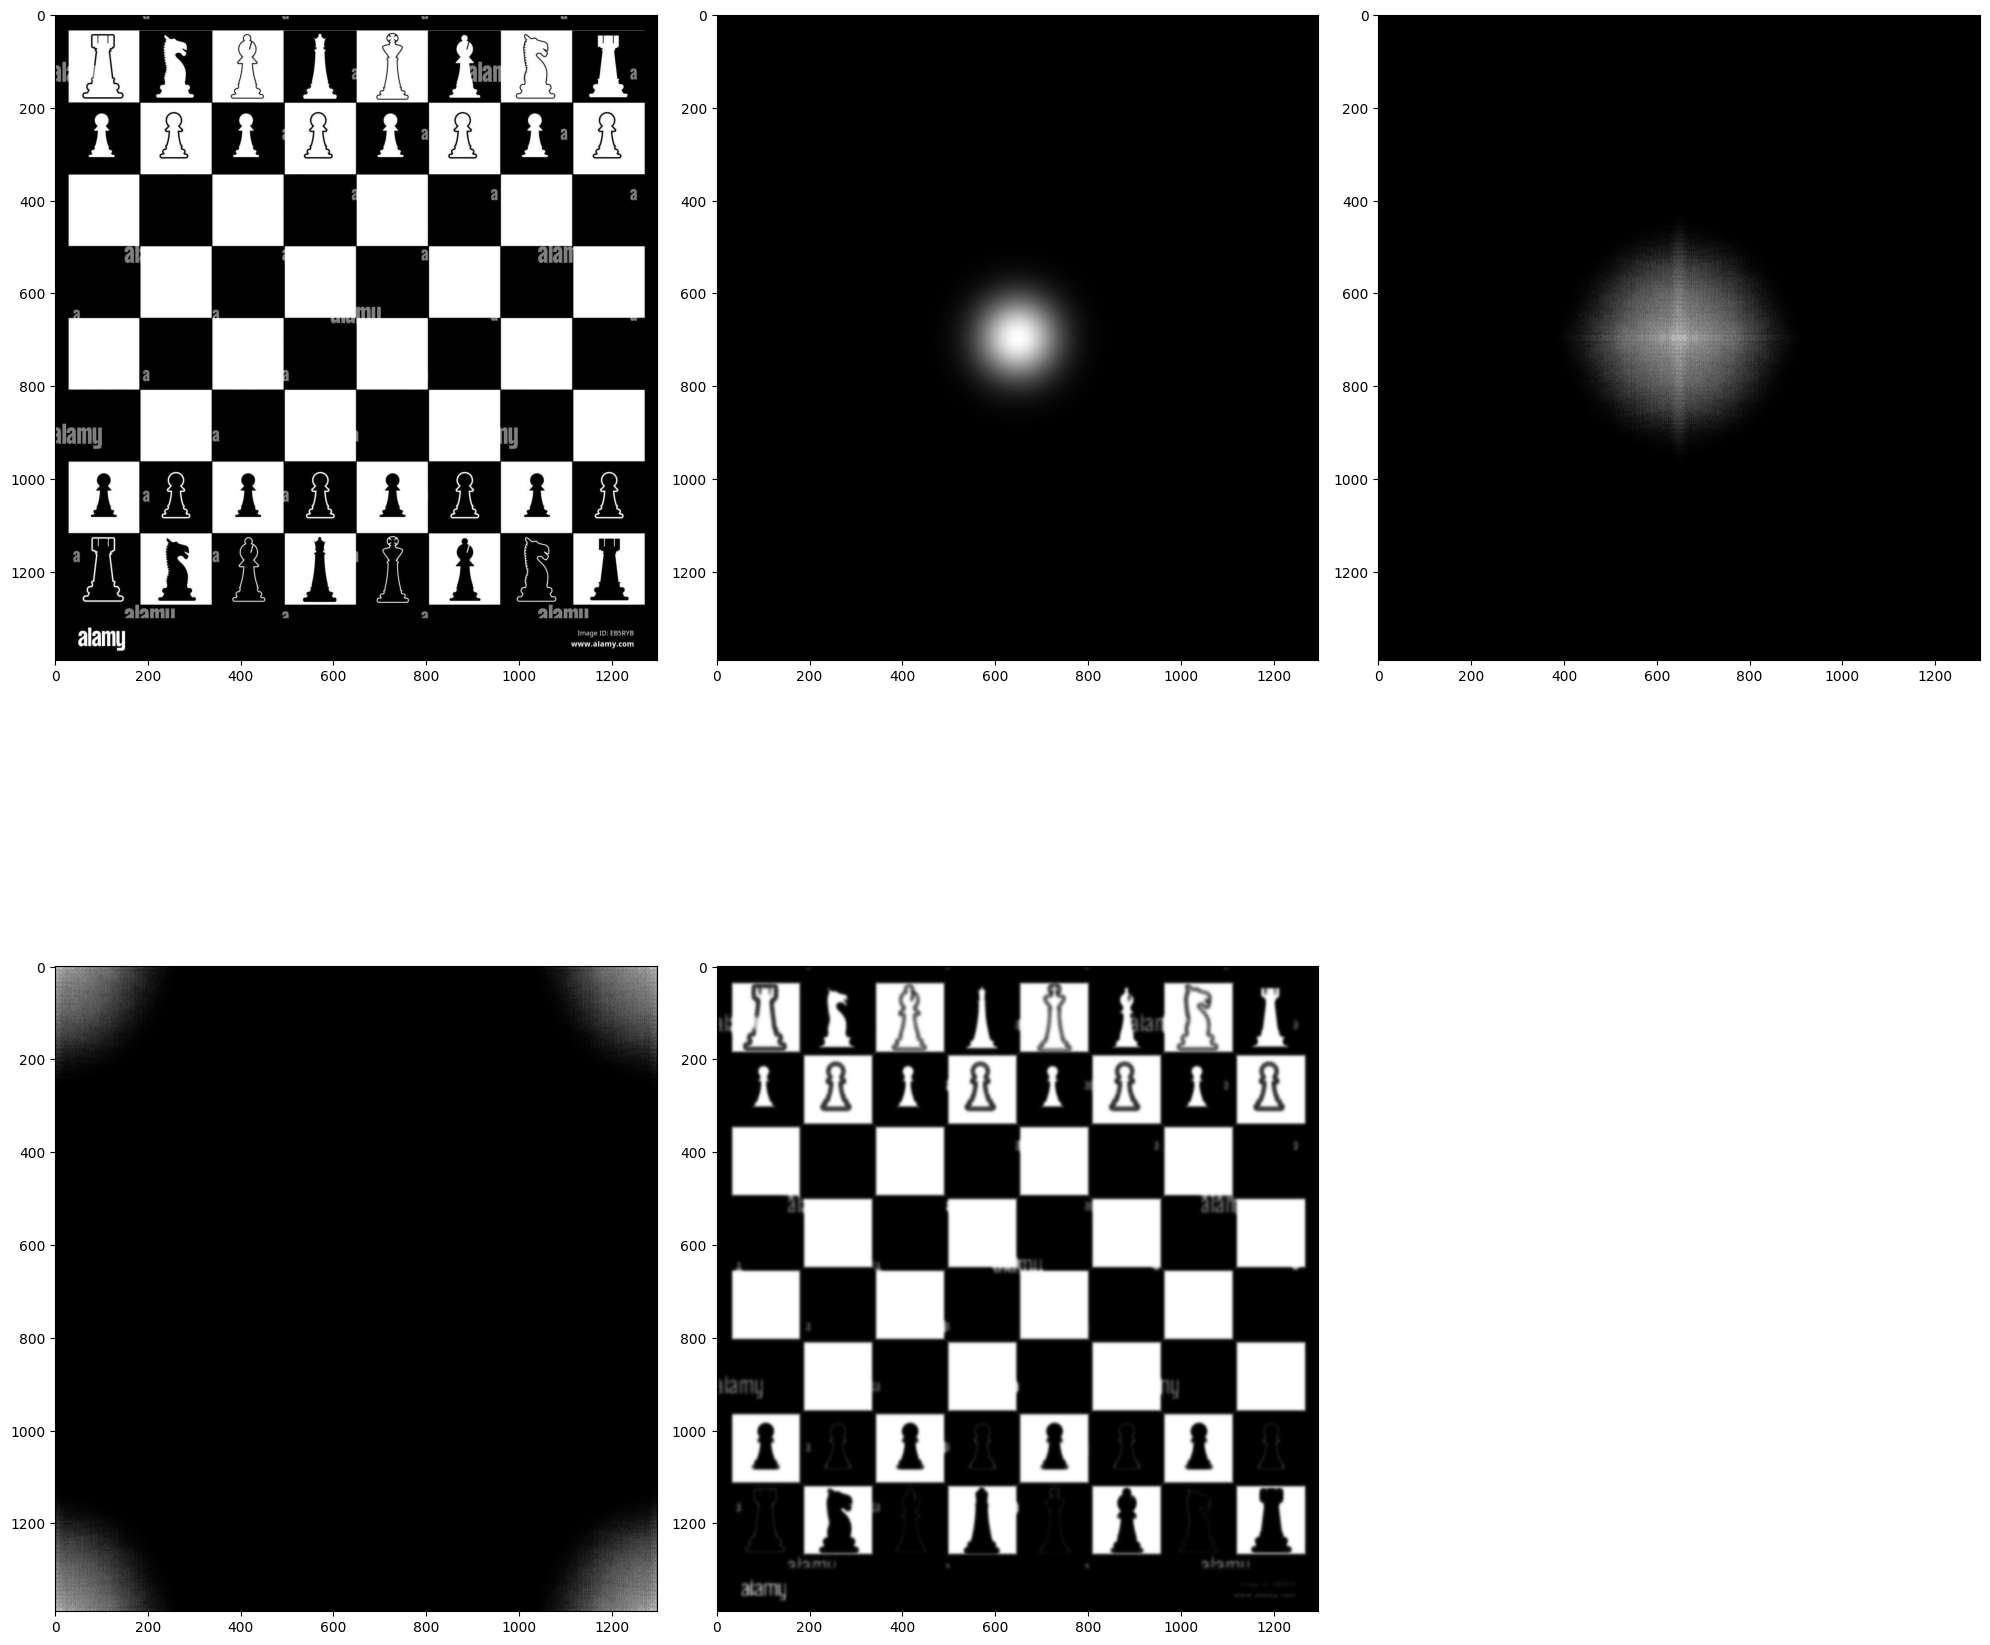

In [72]:
rows, cols = image.shape
Gaussian_Lowpas = np.ones(image.shape, dtype=np.float32)
D0 = 60
n = 2
for i in range(rows):
    for j in range(cols):
        Gaussian_Lowpas[i, j] = np.exp(-(distance(i, j)**2) / (2 * (D0 ** 2)))

f_filtered = shifted_f * Gaussian_Lowpas

f_filtered_shifted = np.fft.ifftshift(f_filtered)

new_img = np.abs(np.fft.ifft2(f_filtered_shifted))

final_img = np.expm1(new_img)

plt.figure(figsize=(20, 20))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(Gaussian_Lowpas, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(np.log1p(np.abs(f_filtered)), cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(np.log1p(np.abs(f_filtered_shifted)), cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(final_img, cmap='gray')
plt.tight_layout()
plt.show()

# Ideal Highpass Filters

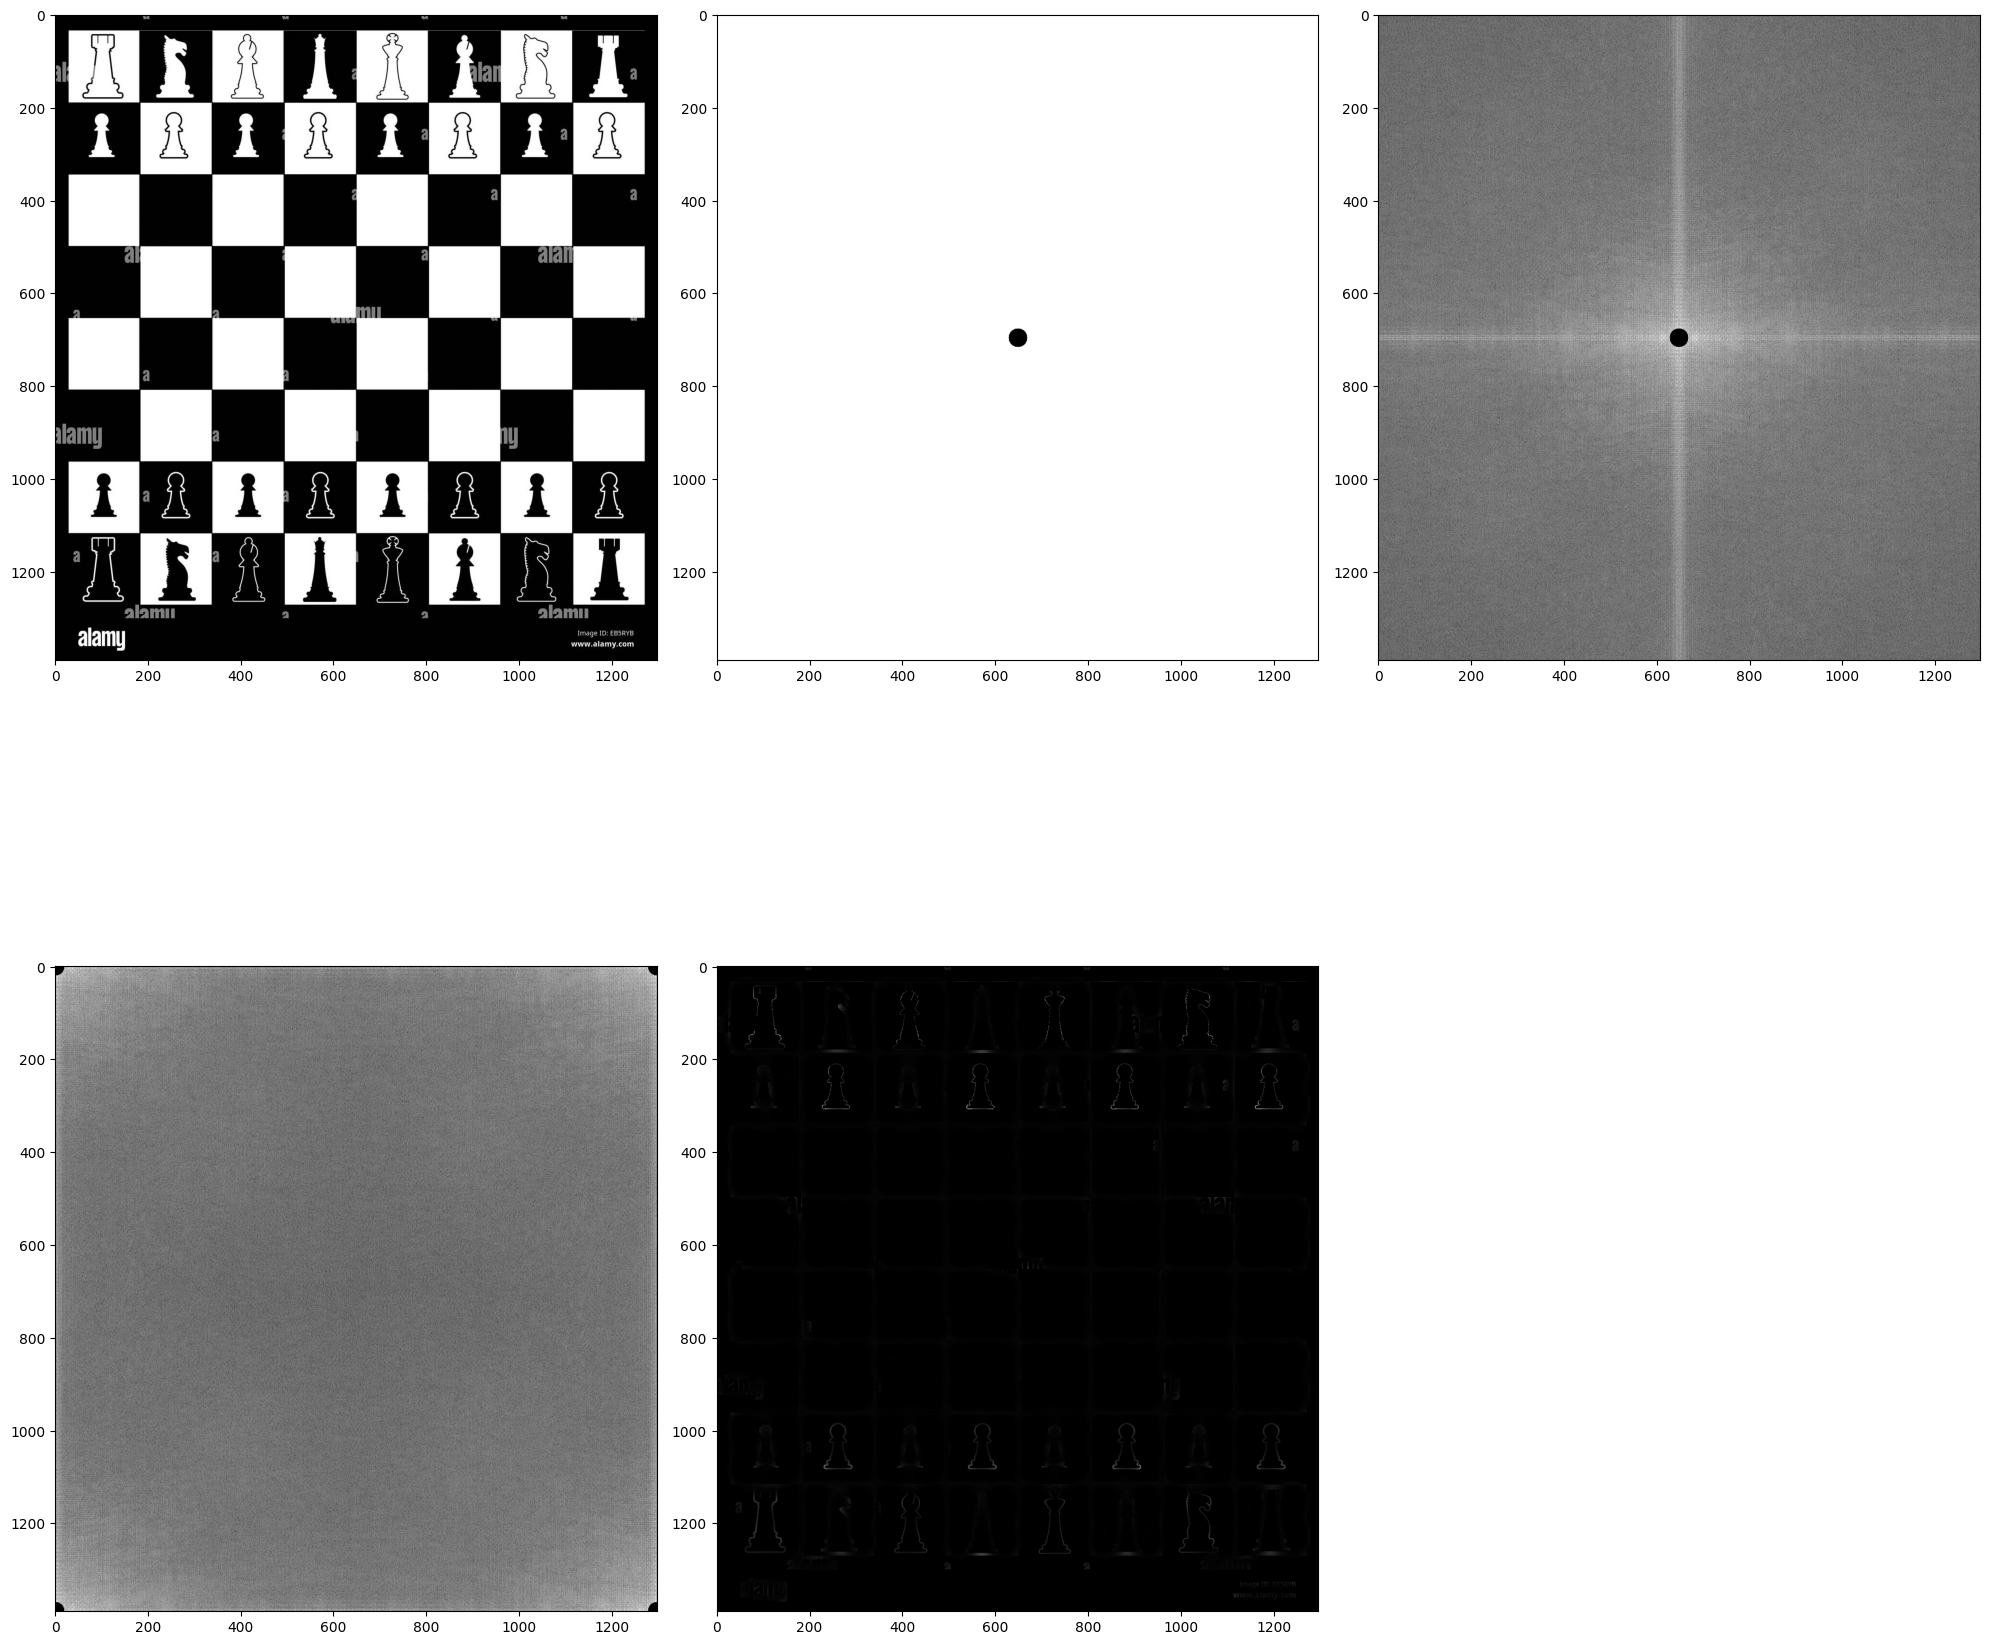

In [73]:
rows, cols = image.shape
Ideal_Highpass = np.ones(image.shape, dtype=np.float32)
D0 = 20
for i in range(rows):
    for j in range(cols):
        if distance(i, j) <= D0:
            Ideal_Highpass[i, j] = 0
        else:
            Ideal_Highpass[i, j] = 1

f_filtered = shifted_f * Ideal_Highpass

f_filtered_shifted = np.fft.ifftshift(f_filtered)

new_img = np.abs(np.fft.ifft2(f_filtered_shifted))

final_img = np.expm1(new_img)

plt.figure(figsize=(20, 20))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(Ideal_Highpass, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(np.log1p(np.abs(f_filtered)), cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(np.log1p(np.abs(f_filtered_shifted)), cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(final_img, cmap='gray')
plt.tight_layout()
plt.show()

# Butterworth Highpass Filters

/tmp/ipykernel_20473/2400312311.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  Butterworth_Highpass[i, j] = 1 / (1 + (D0/distance(i, j))**(2 * n))


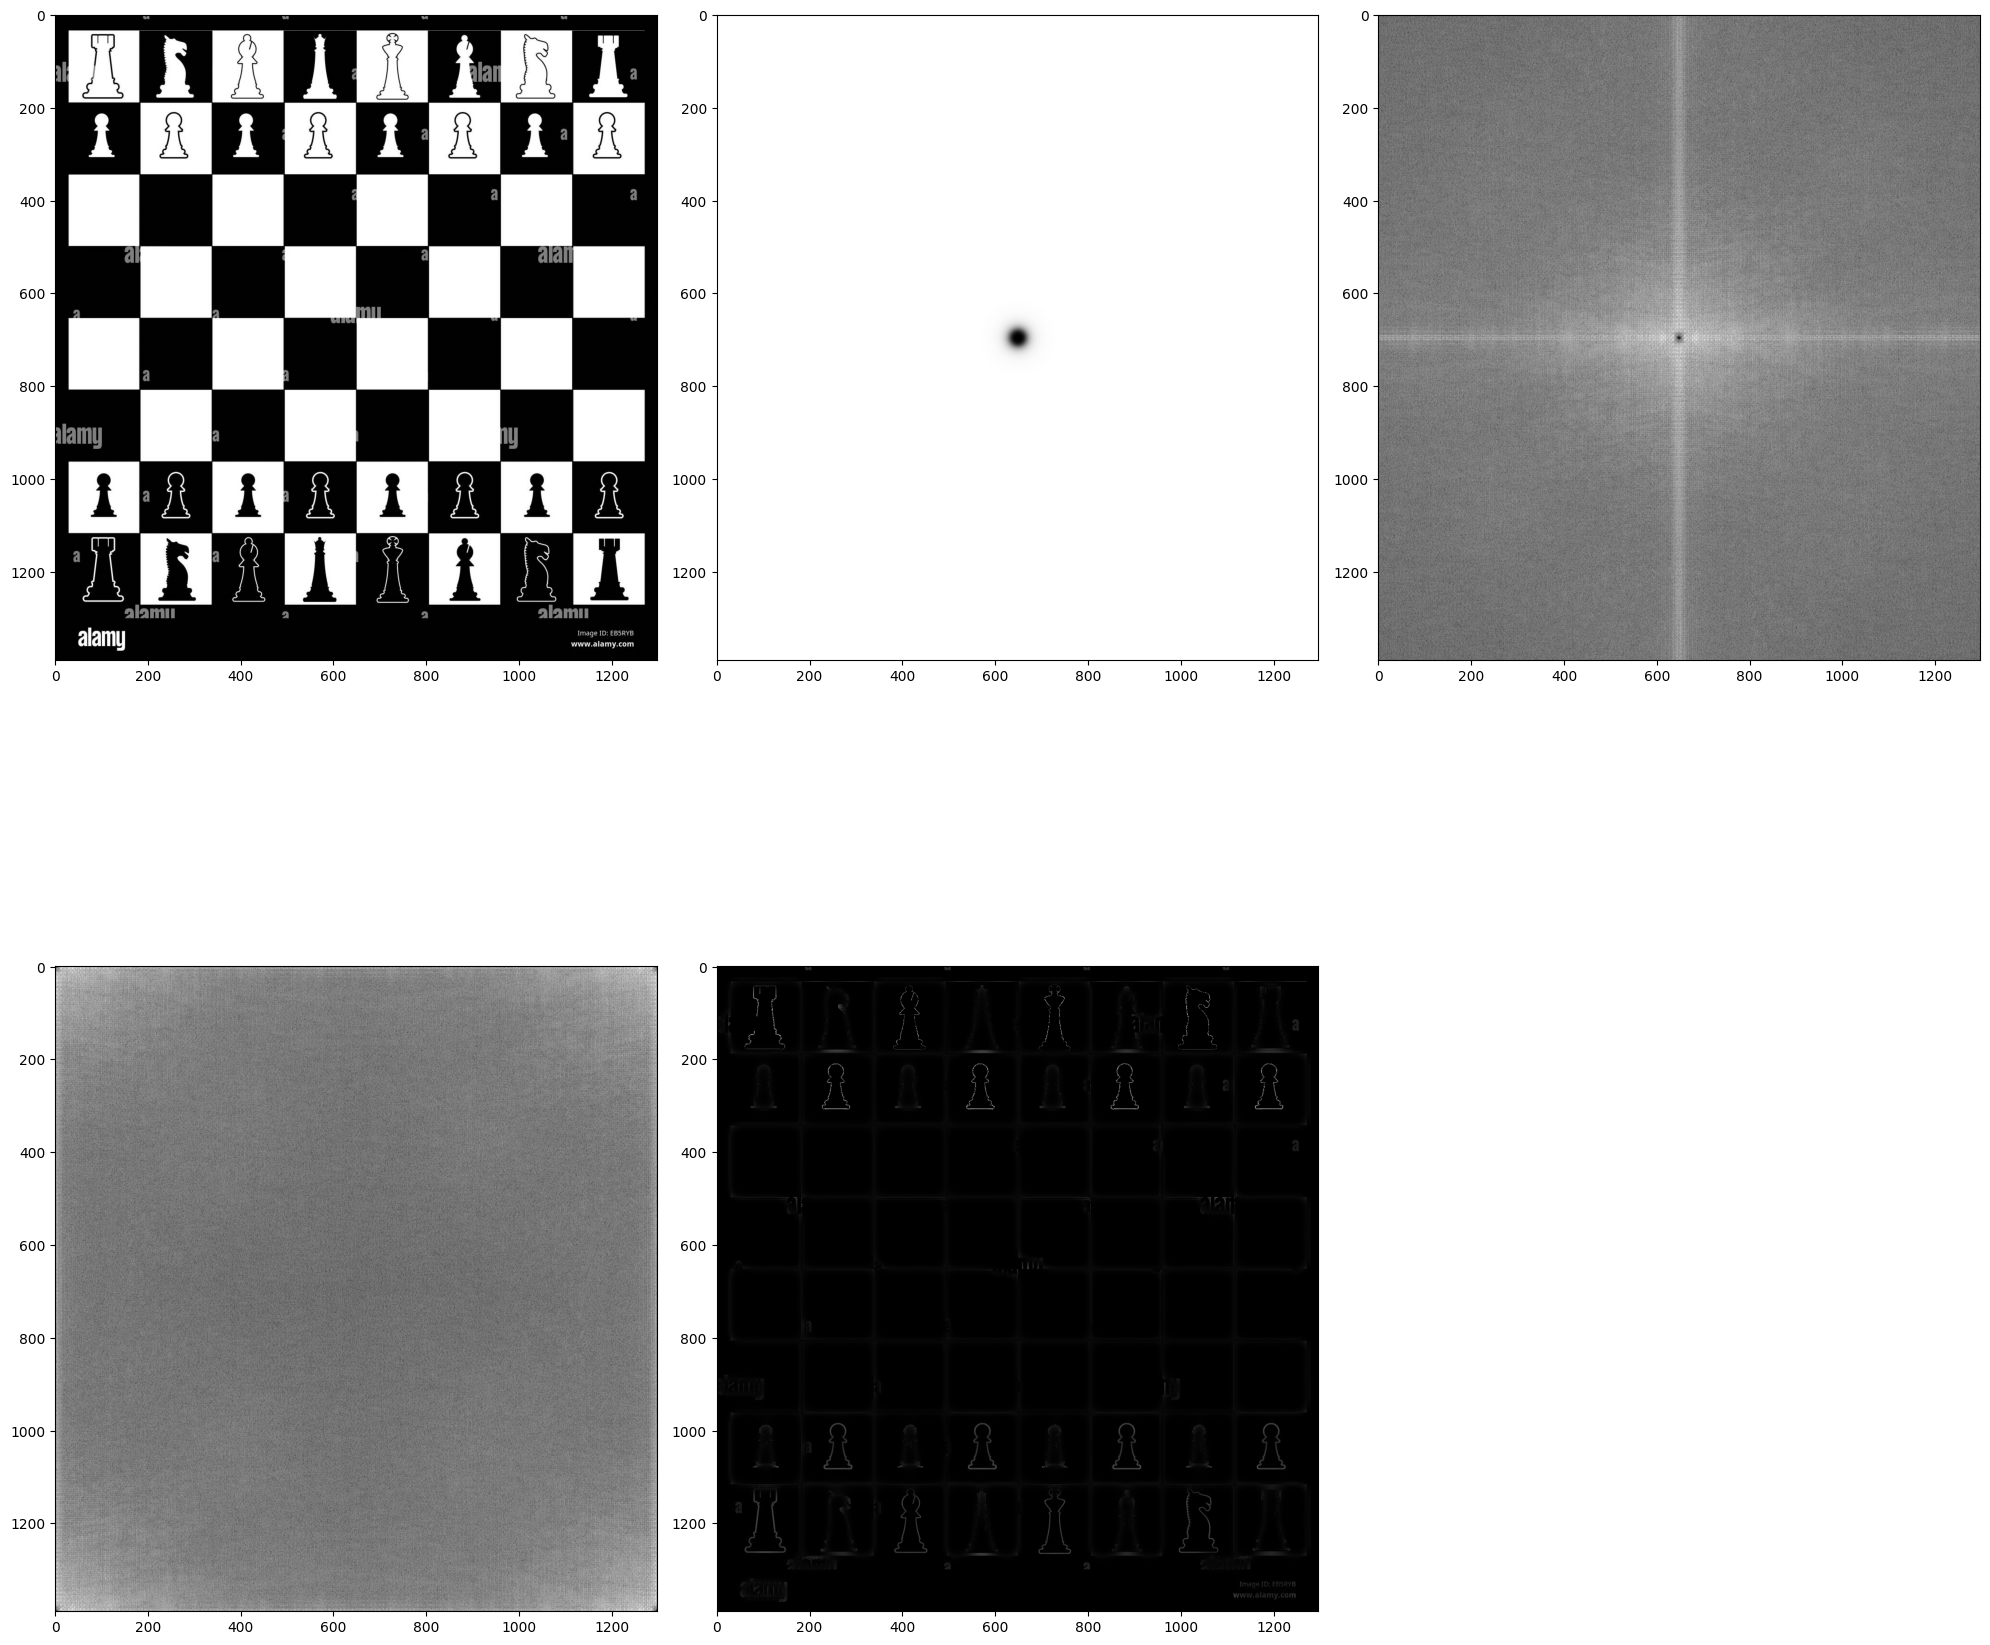

In [74]:
rows, cols = image.shape
Butterworth_Highpass = np.ones(image.shape, dtype=np.float32)
D0 = 20
n = 2
for i in range(rows):
    for j in range(cols):
        Butterworth_Highpass[i, j] = 1 / (1 + (D0/distance(i, j))**(2 * n))

f_filtered = shifted_f * Butterworth_Highpass

f_filtered_shifted = np.fft.ifftshift(f_filtered)

new_img = np.abs(np.fft.ifft2(f_filtered_shifted))

final_img = np.expm1(new_img)

plt.figure(figsize=(20, 20))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(Butterworth_Highpass, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(np.log1p(np.abs(f_filtered)), cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(np.log1p(np.abs(f_filtered_shifted)), cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(final_img, cmap='gray')
plt.tight_layout()
plt.show()

# Gaussian Highpass

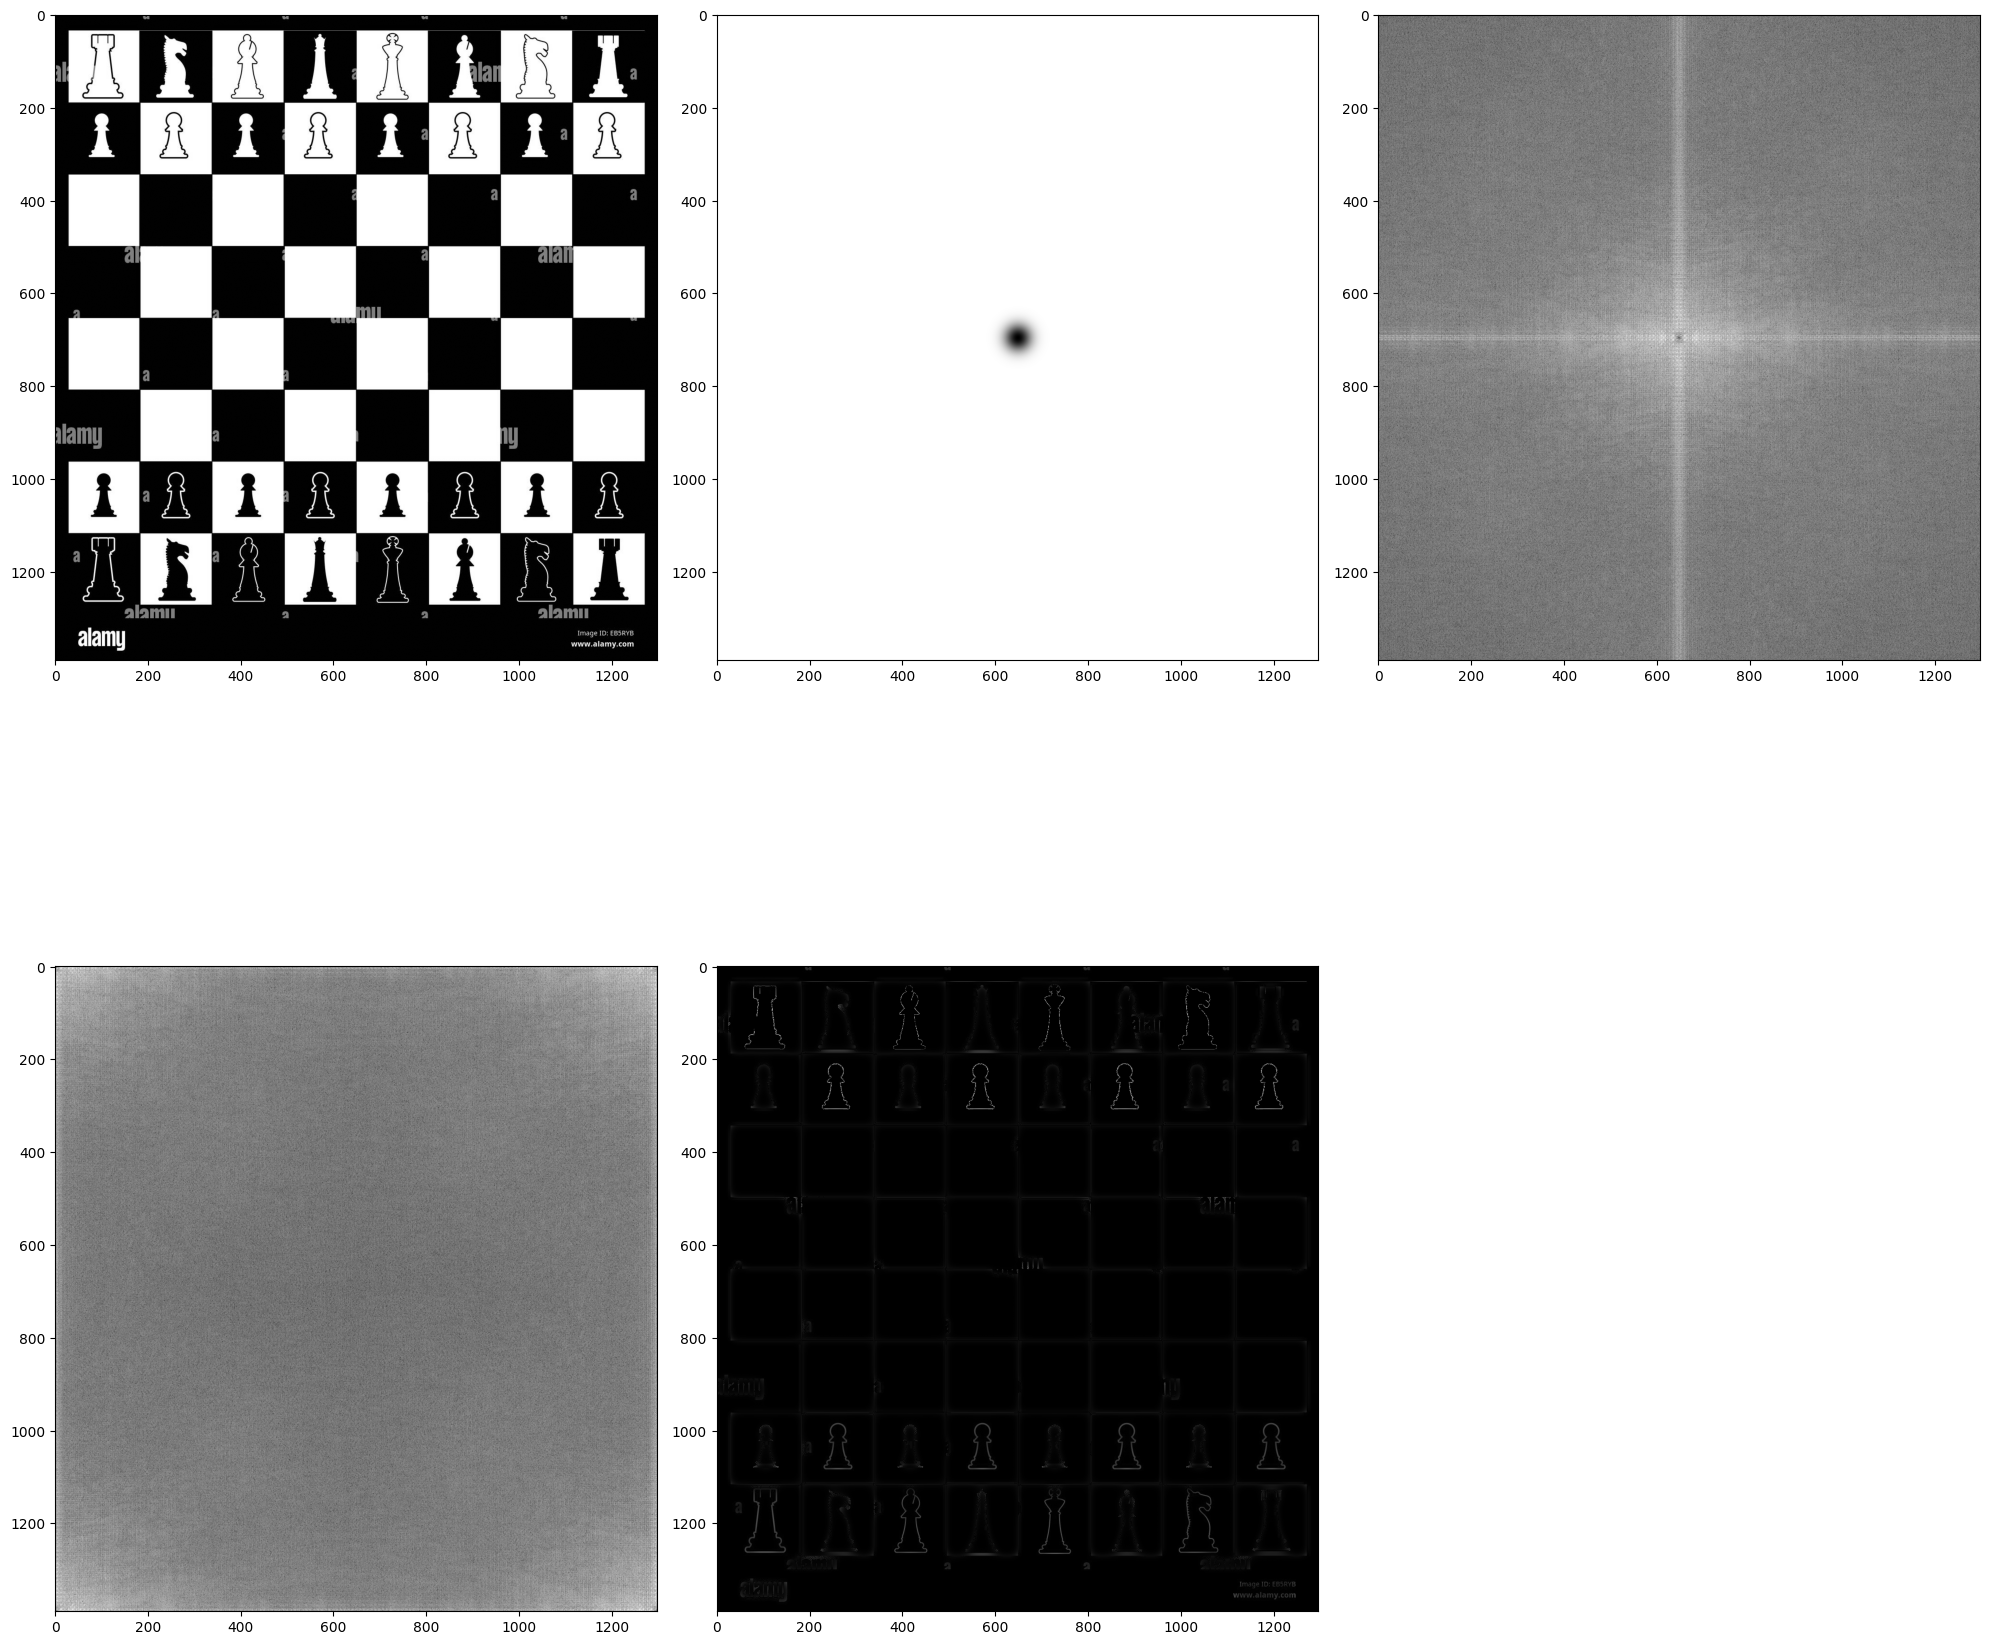

In [75]:
rows, cols = image.shape
Gaussian_Highpass = np.ones(image.shape, dtype=np.float32)
D0 = 20
n = 2
for i in range(rows):
    for j in range(cols):
        Gaussian_Highpass[i, j] = 1 - np.exp(-(distance(i, j)**2) / (2 * (D0 ** 2)))

f_filtered = shifted_f * Gaussian_Highpass

f_filtered_shifted = np.fft.ifftshift(f_filtered)

new_img = np.abs(np.fft.ifft2(f_filtered_shifted))

final_img = np.expm1(new_img)

plt.figure(figsize=(20, 20))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(Gaussian_Highpass, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(np.log1p(np.abs(f_filtered)), cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(np.log1p(np.abs(f_filtered_shifted)), cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(final_img, cmap='gray')
plt.tight_layout()
plt.show()